In [1]:
import vaex
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import astropy.coordinates as coord
import gala.coordinates as gc
import astropy.units as u

In [2]:
vaex.__version__

'1.0.0-beta.6'

In [4]:
#2686.fits `parallax`/sqrt(`phot_g_mean_flux`) < 0.0012 AND `phot_g_mean_mag` < 19.5 AND `bp_rp` > 1.5
#2685.fits `parallax`/sqrt(`phot_g_mean_flux`) < 0.0012 AND `phot_g_mean_mag` < 19.5
#2719.fits 
#gaia2massGiants.pkl parallax/sqrt(phot_g_mean_mag) < 0.0012 AND phot_g_mean_mag < 18.5 AND ABS(b) > 20
#cache_file = 'gaia2massGiants.pkl'
#with open(cache_file, "rb") as f:
#    res = pickle.load(f)
#giants = Table(res)
hdugiants = fits.open('2719.fits')
giants = Table(hdugiants[1].data)

In [4]:
#rotate then add to vaex 
#check coloring if I can do ra and dec 
giants.dtype.names

('source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'phot_g_n_obs',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_n_obs',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_n_obs',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'radial_velocity',
 'radial_velocity_error',
 'e_bp_min_rp_val',
 'l',
 'b',
 'a_g_val')

In [6]:
ds = vaex.from_astropy_table(giants)
ds = ds.dropna(column_names=['parallax', 'pmra'])
ds.export_hdf5('2719.hdf5')
ds = vaex.open('2719.hdf5')


In [87]:
subset = ds[0:10]

(10.0, 18.0)

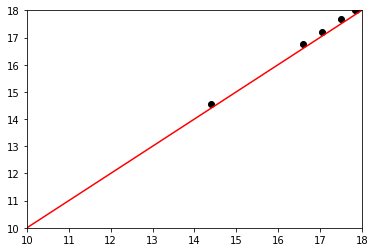

In [93]:
plt.plot(-2.5 * np.log10(subset.phot_g_mean_flux.values) + 25.525, subset.phot_g_mean_mag.values, "ko")
plt.plot([-100., 100.], [-100., 100.], "r-")
plt.xlim(10, 18)
plt.ylim(plt.xlim())

In [7]:
ds['pm'] = np.sqrt(ds.pmra**2 + ds.pmdec**2)
ds['shmag'] = ds.parallax*10**(0.2*ds.phot_g_mean_mag)
ds['bp_rp'] = ds.phot_bp_mean_mag - ds.phot_rp_mean_magd
ds['l_wrap'] = ds.l 

In [37]:
#xind=betw(j-h-ej+eh-0.561*(j-k-ej+ek),.22,.36)
#selectionColorGiants = (ds.j_m - ds.k_m > 0.8) & ((ds.j_m-ds.h_m - 0.561*(ds.j_m - ds.k_m))>0.22) & ((ds.j_m-ds.h_m - 0.561*(ds.j_m - ds.k_m))<0.36) 
ds.select((ds.bp_rp < 0.3) & notMag & (ds.parallax < 0.5), name='bhb')
ds.select(ds.pm < 2.5, name='slow')
ds.select(ds.phot_g_mean_mag < 17, name='goodG')
ds.select(ds.phot_g_mean_mag < 18, name='medG')
ds.select(ds.phot_g_mean_mag > 14, name='faintG')
ds.select(ds.parallax < 0.1, name='far')
ds.select(ds.bp_rp > 1.5, name='red')
#ds.select(ds.)
ds.select((ds.pm < 10**0.75) & (ds.phot_g_mean_mag < 18) & (ds.phot_g_mean_mag>14) & (ds.parallax < 0.1) & ((ds.ra > 110) & (ds.ra < 350) | (ds.dec > -55)), name='gaia')
notMag = (ds.ra > 110) & (ds.ra < 350) | (ds.dec > -55)
ds.select(notMag, name='notMagCloud')

<string>:1: RuntimeWarning: invalid value encountered in less


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


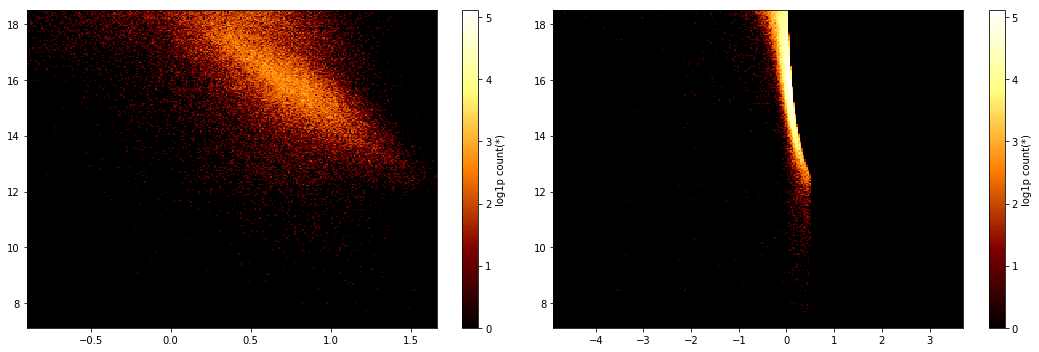

In [25]:
ds.plot([[ds.pm.log10(), ds.phot_g_mean_mag], [ds.parallax, ds.phot_g_mean_mag]], 
        selection=['bhb'], f='log1p', figsize=(15, 5), xlabel='log10 pm')

(720, 180)

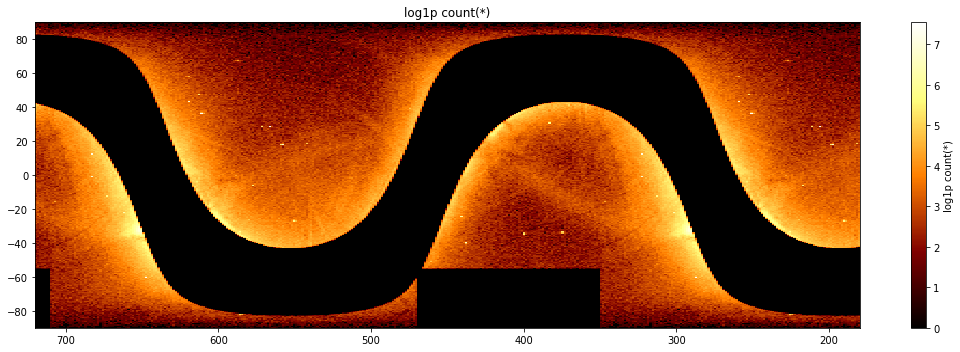

In [38]:
#smooth_pre=0.5
ds.plot(ds.ra*1, ds.dec, f='log1p', limits=[[360, 0], [-90, 90]], selection='gaia', figsize=(15,5))
ds.plot(ds.ra+360, ds.dec, f='log1p', limits=[[360+360, 360], [-90, 90]], colorbar=False, selection='gaia', figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


In [27]:
ds.plot_widget(ds.l, ds.b, f='log1p', selection='bhb')


A Jupyter Widget

In [28]:
ds.plot_widget(ds.pmra, ds.pmdec, f='log1p', selection='bhb')

A Jupyter Widget

In [30]:
ds.export_hdf5('bhb.hdf5', selection='bhb')

<string>:1: RuntimeWarning: invalid value encountered in less


In [22]:
ds.select_box(['pmra', 'pmdec'], [(),()])
ds.plot(ds.ra, ds.dec, selection=)

SyntaxError: invalid syntax (<ipython-input-22-ce9178aec8ef>, line 1)

In [23]:
ds.select_box?

(720, 180)

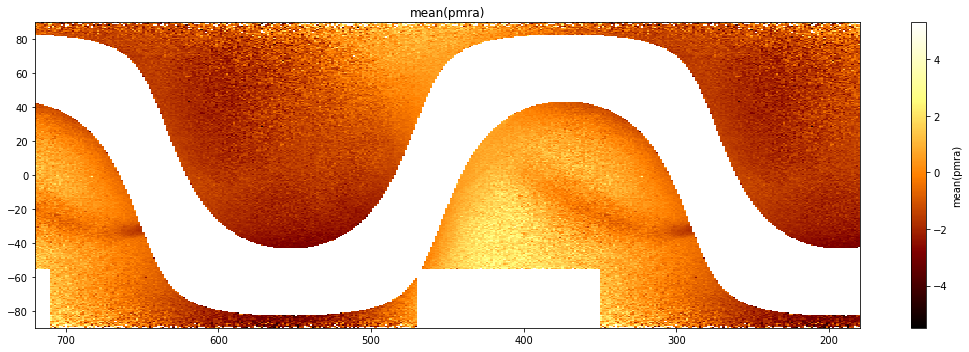

In [10]:
what = 'mean(pmra)'
ds.plot(ds.ra*1, ds.dec, what=what, limits=[[360, 0], [-90, 90]], selection='gaia', figsize=(15,5))
ds.plot(ds.ra+360, ds.dec, what=what, limits=[[360+360, 360], [-90, 90]], colorbar=False, selection='gaia', figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


(720, 180)

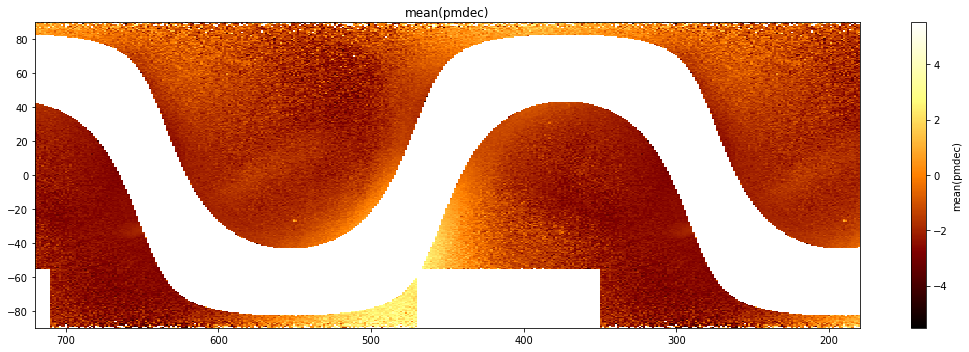

In [11]:
what='mean(pmdec)'
ds.plot(ds.ra*1, ds.dec, what=what, limits=[[360, 0], [-90, 90]], selection='gaia', figsize=(15,5))
ds.plot(ds.ra+360, ds.dec, what=what, limits=[[360+360, 360], [-90, 90]], colorbar=False, selection='gaia', figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


(720, 180)

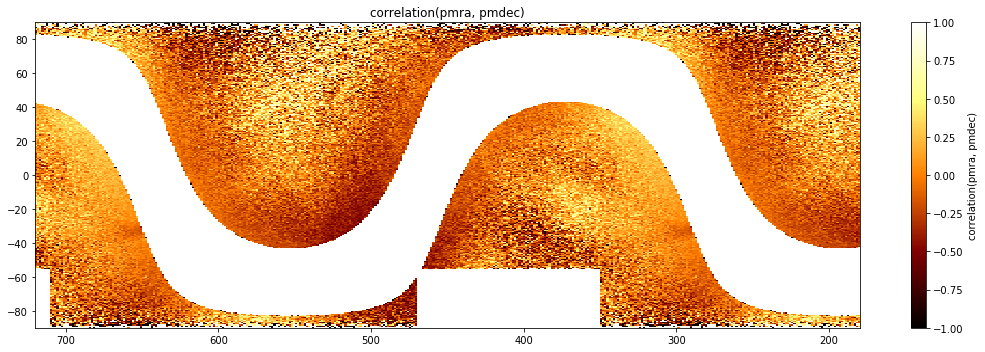

In [12]:
what='correlation(pmra, pmdec)'
ds.plot(ds.ra*1, ds.dec, what=what, limits=[[360, 0], [-90, 90]], selection='gaia', figsize=(15,5))
ds.plot(ds.ra+360, ds.dec, what=what, limits=[[360+360, 360], [-90, 90]], colorbar=False, selection='gaia', figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


(720, 180)

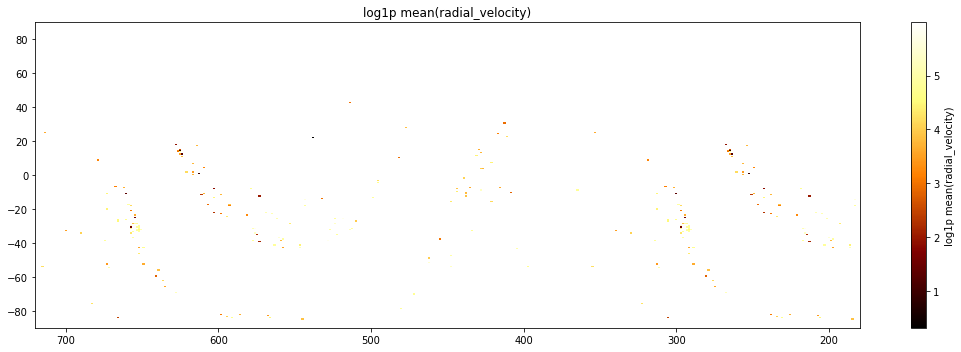

In [15]:
what='mean(radial_velocity)'
ds.plot(ds.ra*1, ds.dec, what=what, limits=[[360, 0], [-90, 90]], selection='gaia', figsize=(15,5), f='log1p')
ds.plot(ds.ra+360, ds.dec, f='log1p', what=what, limits=[[360+360, 360], [-90, 90]], colorbar=False, selection='gaia', figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


In [16]:
ds.select((ds.pm < 10**0.75) & (ds.phot_g_mean_mag < 18.5) & 
          (ds.phot_g_mean_mag>14) & (ds.parallax < 1) & 
          ((ds.ra > 110) & (ds.ra < 350) | (ds.dec > -55)) & (ds.b.abs() > 22), name='gaiaNoDisk')

In [48]:
ds.plot_widget(ds.ra*1, ds.dec, f='log1p', selection='gaia')

A Jupyter Widget

In [18]:
coordinates = coord.ICRS(ra=giants['ra']*u.deg, dec=giants['dec']*u.deg, 
                         pm_ra_cosdec=giants['pmra']*u.mas/u.yr, pm_dec=giants['pmdec']*u.mas/u.yr)
sagcoord = coordinates.transform_to(gc.Sagittarius)

In [20]:
ds['phi1'] = sagcoord.Lambda.wrap_at(180*u.deg).value
ds['phi2'] = sagcoord.Beta.value
ds['pmphi1'] = sagcoord.pm_Lambda_cosBeta.value
ds['pmphi2'] = sagcoord.pm_Beta.value
ds['pmSag'] = np.sqrt(ds.pmphi1**2 + ds.pmphi2**2)

In [21]:
ds.select((ds.phi2.abs() < 30) & (ds.pm < 10**0.75) & (ds.phot_g_mean_mag < 18.5) & (ds.phot_g_mean_mag>14) & (ds.parallax < 1) , name='sag') #& ((ds.phi1.abs() > 60) & (ds.phi1.abs() < 120) )

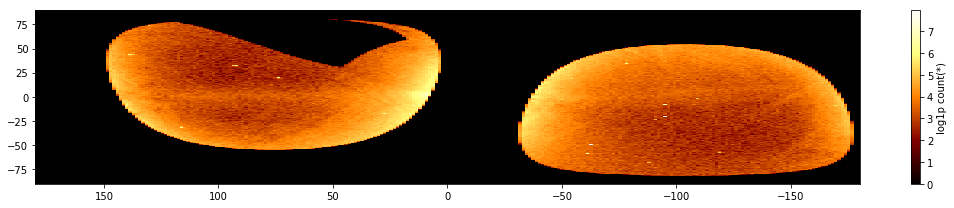

In [24]:
ds.plot(ds.phi1*1, ds.phi2, f='log1p', limits=[[180, -180], [-90, 90]], selection=['gaiaNoDisk'], figsize=(15,3))
#ds.plot(ds.phi1+360, ds.phi2, f='log1p', limits=[[360+360, 360], [-90, 90]], colorbar=False, selection=selectionGaia, figsize=(15,5))
#plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


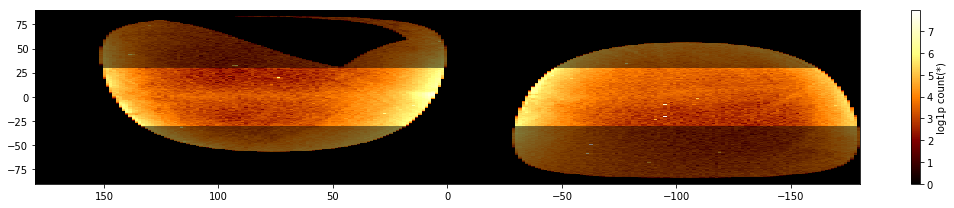

In [25]:
ds.plot(ds.phi1*1, ds.phi2, f='log1p', limits=[[180, -180], [-90, 90]], selection=['gaia', 'sag'], figsize=(15,3))


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


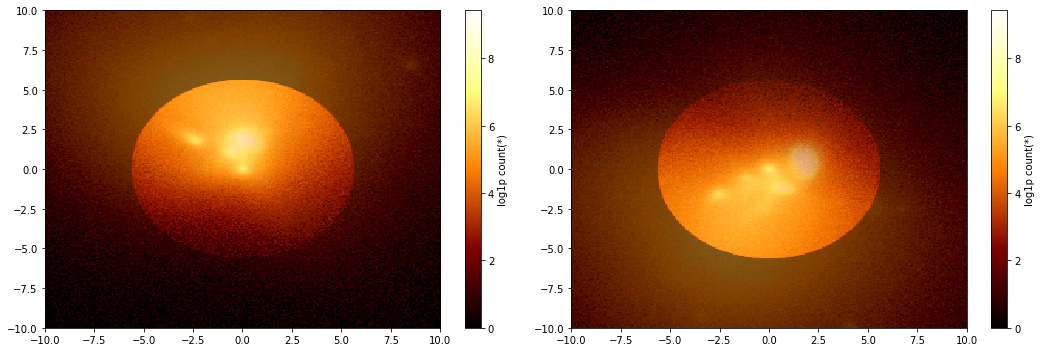

In [27]:
ds.plot([[ds.pmphi1, ds.pmphi2], [ds.pmra*1, ds.pmdec]], limits=[[[-10, 10],[-10, 10]],[[-10, 10],[-10, 10]]], 
        selection=[None, 'sag'], f='log1p', figsize=(15, 5), xlabel='log10 pm')

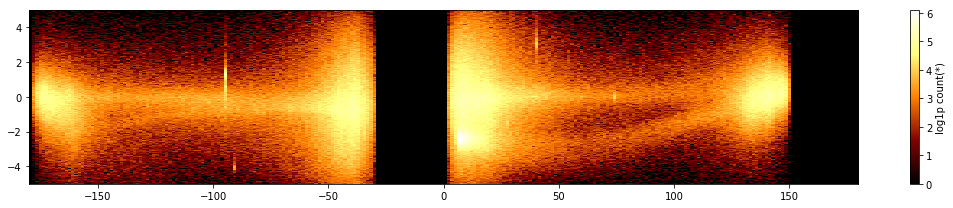

In [28]:
ds.plot(ds.phi1*1, ds.pmphi1, f='log1p', limits = [[-180, 180],[-5, 5]], 
        selection='sag', figsize=(15,3))


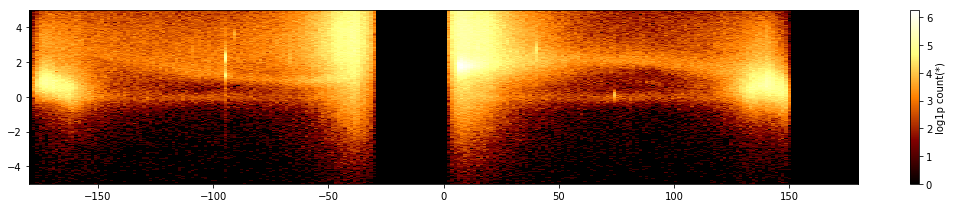

In [36]:
ds.plot(ds.phi1*1, ds.pmphi2, f='log1p', limits = [[-180, 180],[-5, 5]], 
        selection='sag', figsize=(15,3))


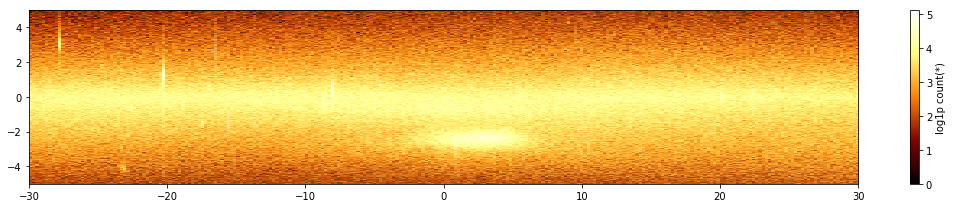

In [35]:
ds.plot(ds.phi2*1, ds.pmphi1, f='log1p', limits= [[-30, 30],[-5, 5]],
        selection=[None, 'sag'], figsize=(15,3))


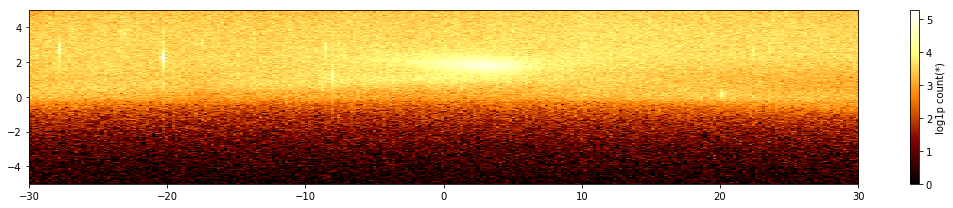

In [34]:
ds.plot(ds.phi2*1, ds.pmphi2, f='log1p', limits= [[-30, 30],[-5, 5]],
        selection=[None, 'sag'], figsize=(15,3))


(720, 180)

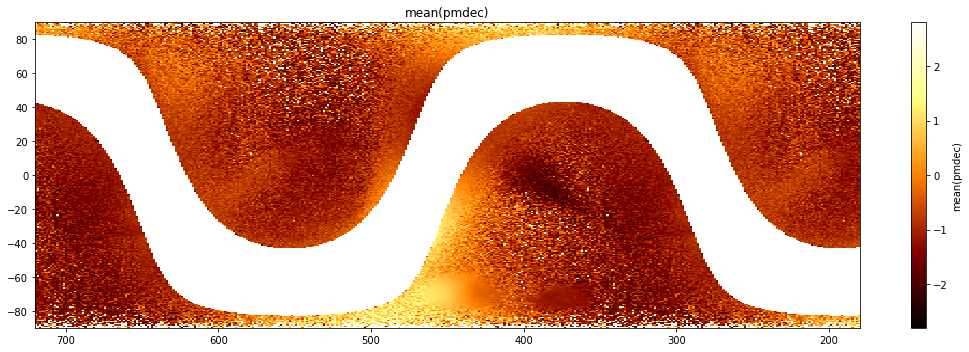

In [37]:
#selection = selectionColorGiants & (ds.parallax < 0.1) 
selection = [(ds.pm < 10**0.45) & (ds.phot_g_mean_mag < 18) & (ds.phot_g_mean_mag>10)]

smooth_pre=0.5
ds.plot(ds.ra*1, ds.dec, what='mean(pmdec)', limits=[[360, 0], [-90, 90]], selection=selection, figsize=(15,5))
ds.plot(ds.ra+360, ds.dec, what='mean(pmdec)', limits=[[360+360, 360], [-90, 90]], colorbar=False, selection=selection, figsize=(15,5))
#ds.plot(ds.ra+360+360., ds.dec, f='log1p', limits=[[360+360, 360], [-90, 90]], colorbar=False, selection=selection, figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


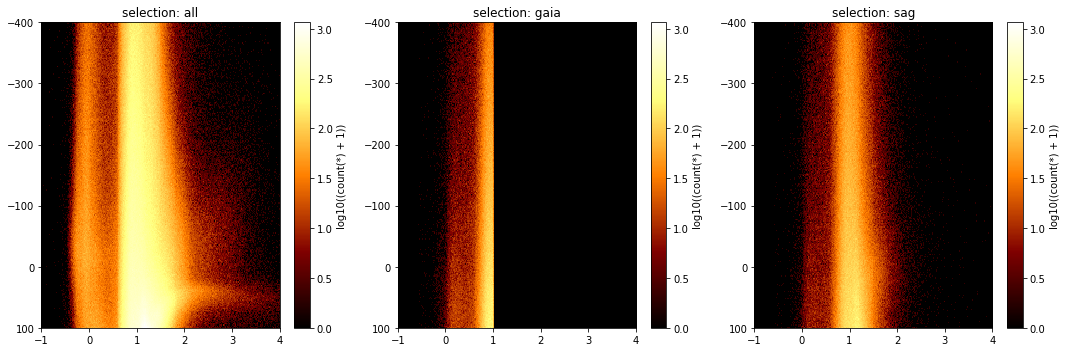

In [79]:
ds.plot(ds.bp_rp, ds.shmag, 
        what=np.log10(vaex.stat.count() + 1), limits=[[-1, 4],[100, -400]], 
        selection=[None, 'gaia', 'sag'], 
        visual=dict(column='selection'), figsize=(15,5), title=None) # , what=vaex.stat.mean(ds.phot_g_mean_mag))

In [83]:
red = ds.bp_rp > 2.0
bright = (ds.shmag < 100) #& notMag
ds.select(red & bright, name='redredgiants')

In [84]:
ds.count(selection='redredgiants')

<string>:1: RuntimeWarning: invalid value encountered in greater


128503.0

(720, 180)

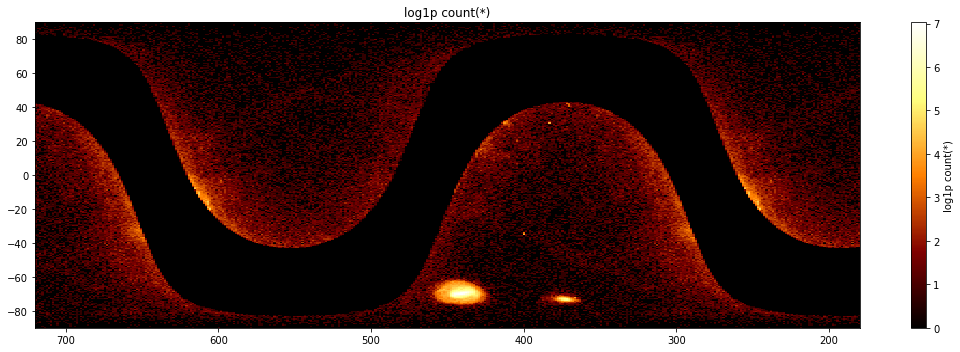

In [85]:
ds.plot(ds.ra*1, ds.dec, f='log1p', limits=[[360, 0], [-90, 90]], selection='redredgiants', figsize=(15,5))
ds.plot(ds.ra+360, ds.dec, f='log1p', limits=[[360+360, 360], [-90, 90]], colorbar=False, selection='redredgiants', figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


In [86]:
ds.plot_widget(ds.ra*1, ds.dec, f='log1p', limits=[[360, 0], [-90, 90]], selection='redredgiants', figsize=(15,5))


A Jupyter Widget

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


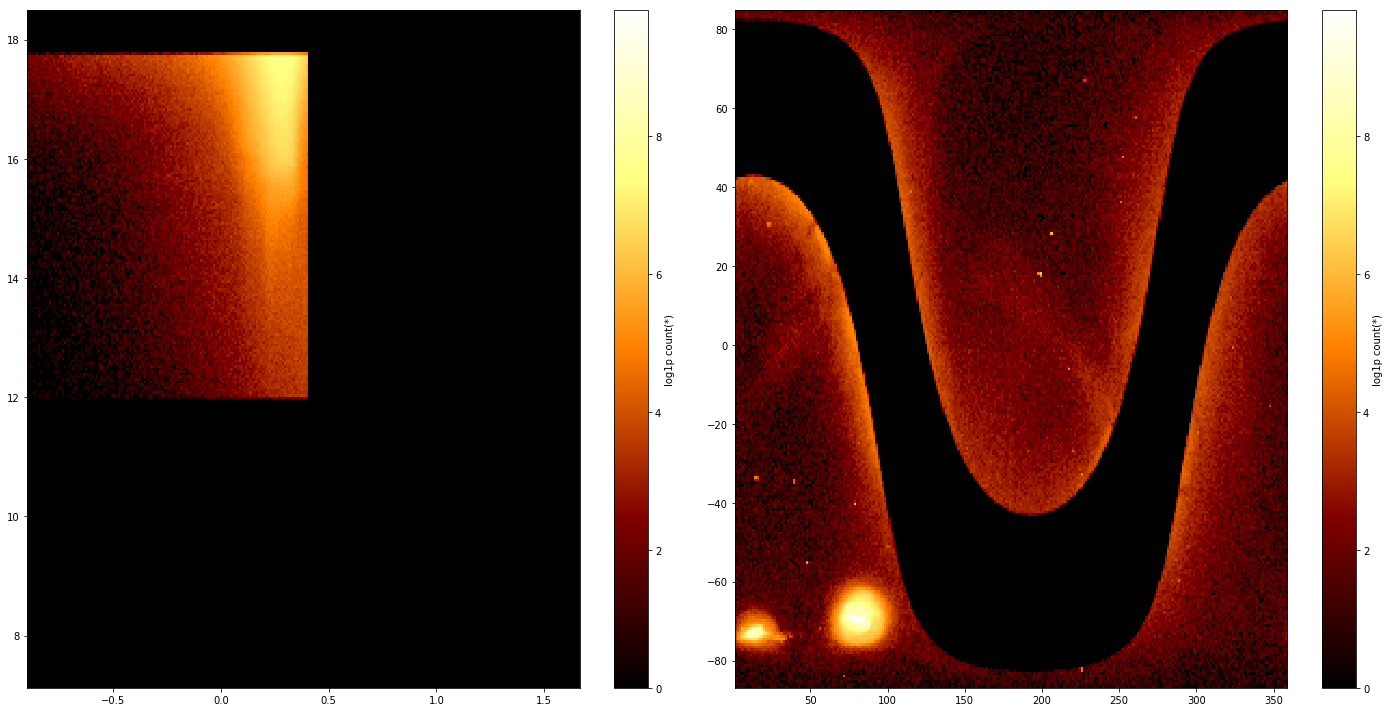

In [39]:
#ds.plot1d(ds.pm.log10())
ds.plot([[ds.pm.log10(), ds.phot_g_mean_mag], [ds.ra*1, ds.dec*1]], f='log1p', figsize=(20, 10), selection=[(ds.pm < 10**0.4)&(ds.phot_g_mean_mag<17.75)&(ds.phot_g_mean_mag>12)])


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


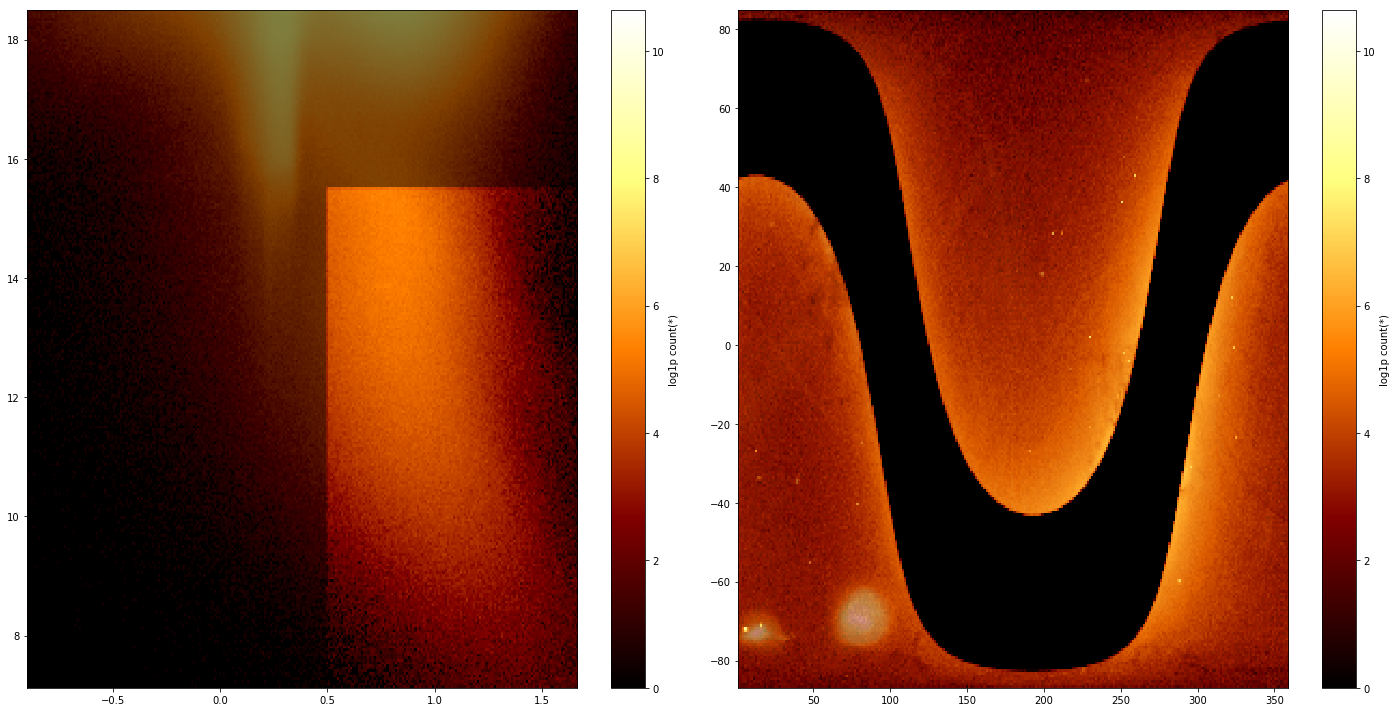

In [40]:
#ds.plot1d(ds.pm.log10())
ds.plot([[ds.pm.log10(), ds.phot_g_mean_mag], [ds.ra*1, ds.dec*1]], f='log1p', figsize=(20, 10), selection=[None, (ds.pm > 10**0.5)&(ds.phot_g_mean_mag<15.5)])


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


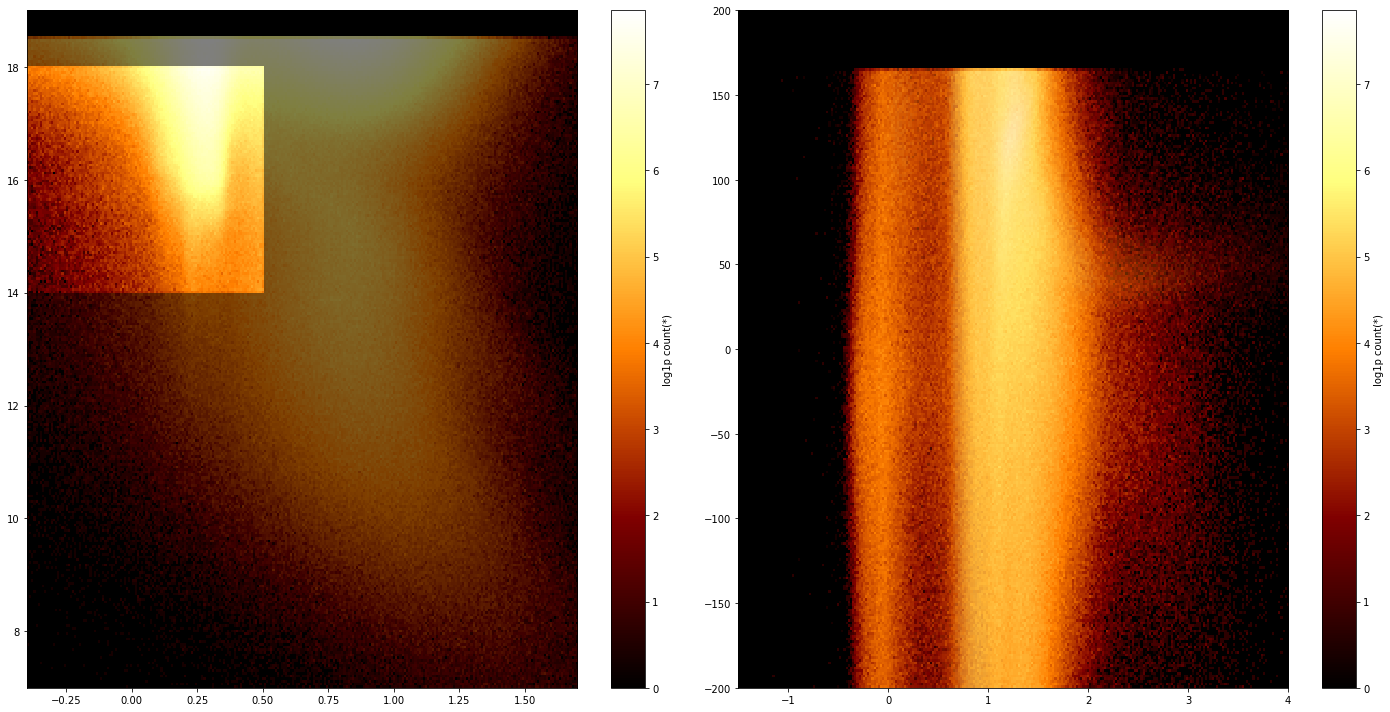

In [41]:
ds.plot([[ds.pm.log10(), ds.phot_g_mean_mag], [ds.bp_rp, ds.shmag]], f='log1p', 
        figsize=(20, 10), selection=[None, (ds.pm < 10**0.5)&(ds.phot_g_mean_mag>14) & (ds.phot_g_mean_mag<18)], 
        limits=[[[-0.4, 1.7], [7, 19]],[[-1.5, 4], [-200, 200]]])

/anaconda3/lib/python3.6/site-packages/vaex/dataset.py:88: RuntimeWarning: invalid value encountered in true_divide
  a /= np.nanmax(a, axis=axis, keepdims=True)


(720, 180)

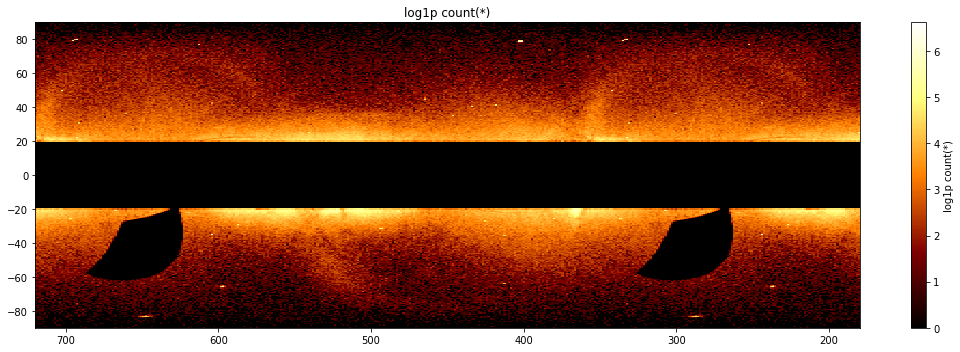

In [42]:
selection = [(ds.pm < 10**0.45) & (ds.phot_g_mean_mag < 18) & (ds.phot_g_mean_mag>14) & notMag]
smooth_pre=0.5
ds.plot(ds.l*1, ds.b, f='log1p', limits=[[360, 0], [-90, 90]], selection=selection, figsize=(15,5))
ds.plot(ds.l+360, ds.b, f='log1p', limits=[[360+360, 360], [-90, 90]], colorbar=False, selection=selection, figsize=(15,5))
ds.plot(ds.l+360+360., ds.b, f='log1p', limits=[[360+360, 360], [-90, 90]], colorbar=False, selection=selection, figsize=(15,5))
plt.xlim(360+360, 180) # the last ds.plot sets the xlim, so grow it again


Sigma is 15.000000 arcmin (0.004363 rad) 
-> fwhm is 35.322301 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


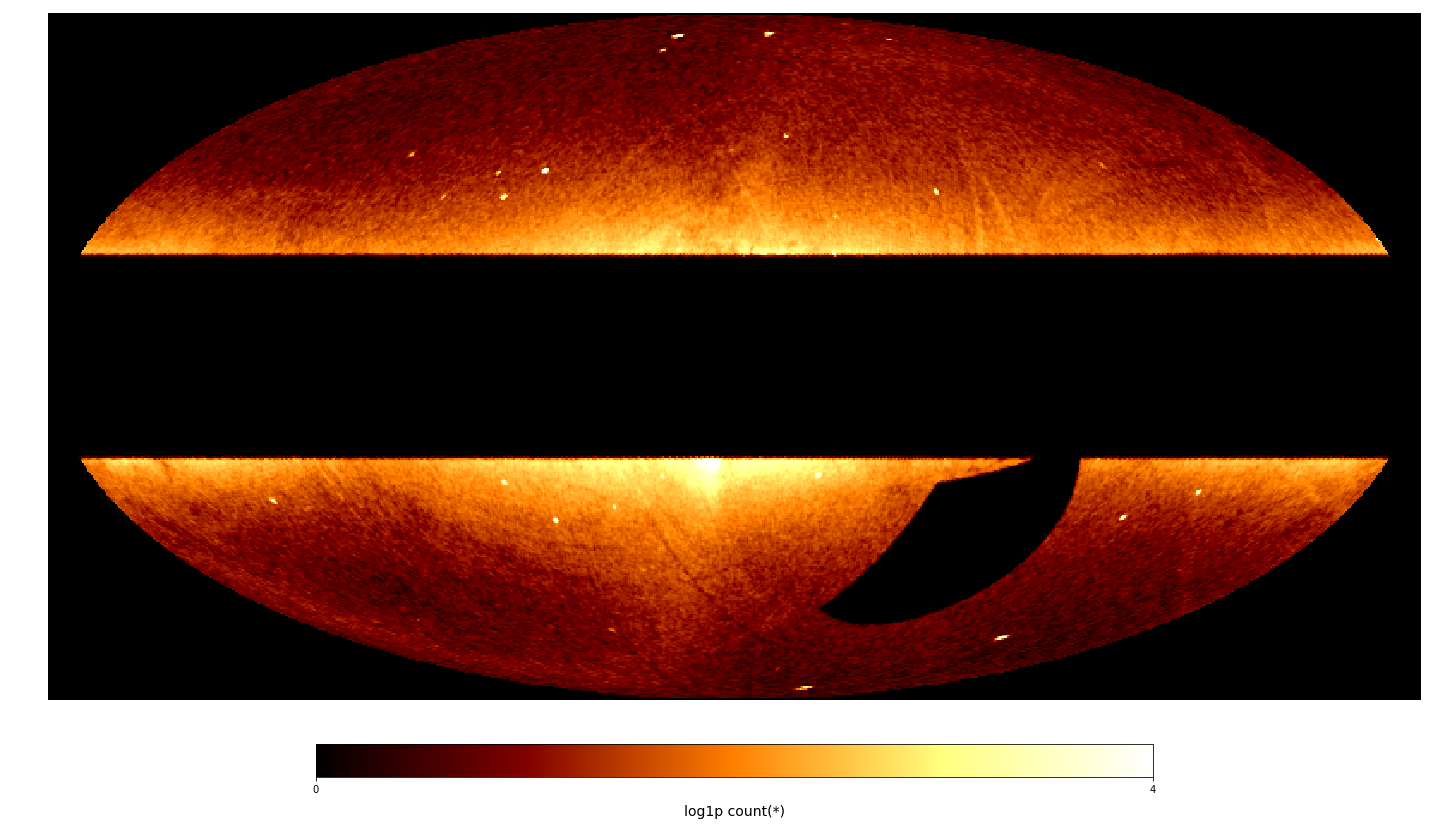

In [43]:
ds.healpix_plot(figsize=(30,15), smooth=0.25, f="log1p", grid_limits=[0, 4], rotation=(0,0,0), selection='gaiaNoDisk')# , selection=[ds.b>20])

In [ ]:
ds.plot?